## Project No2 - Concentration Theorems

## Yiqiao Huang

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

random.seed(1220)
mpl.rcParams['font.size'] = 16

### 0. Setup 

We will consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$. We define the sample mean as 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
The objective of this project is to study the behavior of $\bar X_n$ as $n \rightarrow \infty$. 

### 1. Law of Large Numbers

Here we are going to focus in the convergence in probability and almost surely of the sample mean of i.i.d. random variables. Remember that a sequence of random variables $Y_1, Y_2, \ldots$ converges in probability to a random variable $Y$ if for every $\epsilon > 0$ we have 
$$
\lim_{n \rightarrow \infty} \mathbb P \left( | Y_n - Y | > \epsilon \right) = 0
$$
The **weak law of large numbers** states 

> The sample mean $\bar X_n$ converges in probability to $\mu$.

The **strong law of large numbers** states a more strict sense in which this convergence happens

> The sample mean $\bar X_n$ converges almost surely to $\mu$. 

Let's see how these two behave numerically.

### Notes0918

a.s. (stronger) -> in prob

a.s. convergence:

$$P(\bar{x_n} \text{ converge to } \mu)=1$$

#### Example:

$y_1,y_2,...$, $y_i\sim Ber(\frac{1}{i})$

the sequence does not converge, Since $\sum^{\infty}_{i=1}\frac{1}{i}=\infty$. There will always exist a "1", so not converge a.s.

But converge in prob, because $P(|y_i-0|>\frac{1}{2})=\frac{1}{i}$

CLT: $\sqrt{n}\frac{\bar{x_n}-\mu}{\sigma}\rightarrow N(0,1)$

If replace $\sqrt{n}$ with $n^{1/3}$, this will go to 0. If $n^{2/3}$, going to $\infty$.

#### 1.1. Gaussian case

Consider the simple case where $X_i \sim N(0,1)$. Compute the sample mean for increasing values of $n$ and show how the sample mean converges to $0$. To do this, you can simply show a plot of the sample mean as a function of $n$. 

***Tip:*** You can compute the sample mean of a normal random variable by simply doing
```python
n = 100
one_sample_mean = np.mean(np.random.normal(loc=0.0, scale=1.0, size=n))
```
The same works if you want to compute a total of `n_sim` sample means:
```python
n = 100
n_sim = 500
many_sample_means = np.mean(np.random.normal(loc=0.0, scale=1.0, size=(n, n_sim)), axis=0)
```

In [27]:
# TO DO CELL
N = 100000
gap = 10
n_seq = range(10,N,gap)
sample_mean_n = []
random_sample = np.random.normal(loc=0.0, scale=1.0, size=N)

for n0 in n_seq:
    sample_mean_n.append(np.mean(random_sample[0:n0]))

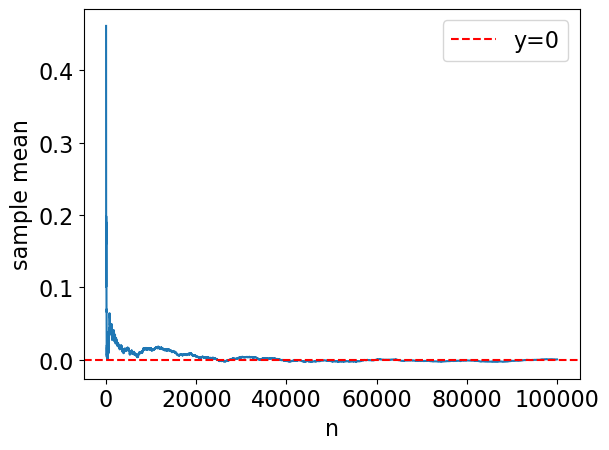

In [33]:
plt.axhline(y=0,color='r', label='y=0', linestyle='--')
plt.plot(n_seq, sample_mean_n)
plt.xlabel('n')
plt.ylabel('sample mean')
plt.legend()

a.s. converge

#### 1.2. Beta distribution

Now, repeat the same experiment but for a Beta distribution with parameters of your choice. Remember that the mean of a Beta distribution with parameters $a$ and $b$ is $a / (a+b)$. 

For this section, it is important that you compute the sample mean as you increase the value of $n$ *for the same realization of the random variables $X_i$*. To do this, first sample all the values of $X_1, X_2, \ldots, X_{n_{max}}$ just one time and then compute the partial averages $\bar X_n$ for different values of $n \leq n_{max}$. 

Make this plot is logarithmic scale for both axes. This is how your solution should look like. If you kernel dies when running the simulations, try reducing the total number of samples.

<img src="solution_1_2.png" alt="Solution" />

In [46]:
# TO DO CELL
alpha = 3
beta = 4
true_mean = alpha/(alpha+beta)
N = 1000000
gap = 100
n_seq = range(100,N,gap)
sample_mean_n = []
rbeta_numbers = np.random.beta(alpha, beta, size=N)
for n0 in n_seq:
    sample_mean_n.append(np.mean(rbeta_numbers[0:n0]))
y = np.log10(np.abs(np.array(sample_mean_n)-true_mean))/np.log(10)

Text(0, 0.5, '$log_{10}|\\bar{x_n}-\\mu|$')

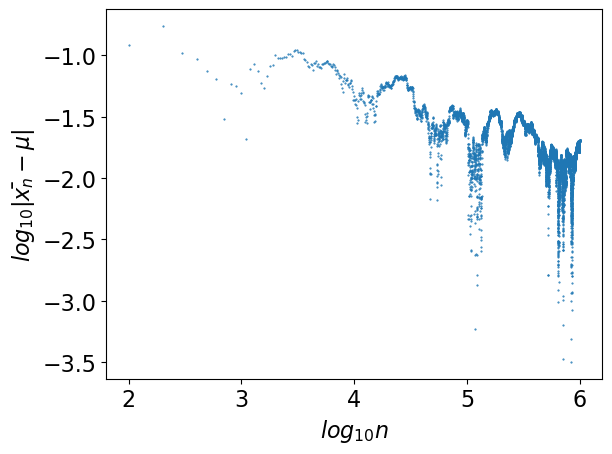

In [58]:
plt.plot(np.log(n_seq)/np.log(10), y, '.', markersize=1)
plt.xlabel(r'$log_{10}n$')
plt.ylabel(r'$log_{10}|\bar{x_n}-\mu|$')

**To Discuss:** When doing this calculations, what time of convergence are we studying? almost surely or in probability? 

**To Discuss:** Can you identify the general trend in the previous plot? Can you give meaning the low peaks in the plot? 

converge almost surely

Trend: decreasing

When $|\bar{x_n}-\mu|$ almost hits 0, $log_{10}|\bar{x_n}-\mu|$ goes to $-\infty$. Then low peak occurs.

#### 1.3. Compute the probability

Now, instead of evaluating the value of $\bar X_n$, compute the probability $\mathbb P \left( | \bar X_n | > \epsilon \right)$ for different values of $n$ and $\epsilon$ and plot the result as a function of $n$. What do you observe? See the next item for an example of the solution for this problem.

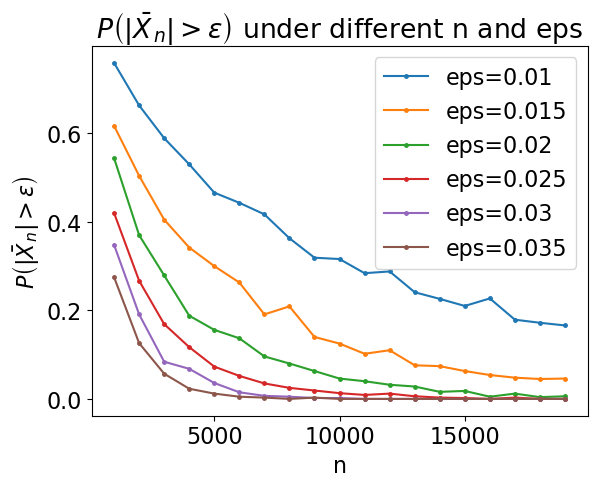

In [62]:
n_seq = range(1000,20000,1000)
eps_seq = np.linspace(0.01, 0.035, 6)
iternum = 1000 # generate samples 1000 times to calculate the probability
random.seed(1220)

for eps in eps_seq:
    prob_list = [] # use to store the probability for each epsilon
    for n in n_seq:
        # generate random numbers with size (iternum,n)
        random_sample = np.random.normal(loc=0.0, scale=1.0, size=(iternum,n))
        # calculate the sample mean of each row
        sample_mean = np.mean(random_sample,axis=1)
        #print(len(sample_mean))
        # calculate how many sample mean is greater than eps
        num_mean_greater_eps = np.sum(np.abs(sample_mean)>eps)
        prob_list.append(num_mean_greater_eps/iternum)

    plt.plot(n_seq,prob_list,label='eps='+str(eps),marker='o',markersize=2.5, linestyle='-')
    
plt.title(r'$P \left( | \bar X_n | > \epsilon \right)$ under different n and eps')
plt.xlabel('n')
plt.ylabel(r'$P \left( | \bar X_n | > \epsilon \right)$')
plt.legend()
plt.show()

#### 1.4. Concentration bounds

Repeat the same plot that in the last item and show how it compares with the upper bound obtain from using Chebyshev's inequality
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq \frac{1}{n \epsilon^2}
$$
and the Chernoff bound
$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq 2 \exp \left( - \frac{\epsilon^2 n}{2} \right)
$$

a.s., stronger

At the end of the day, you should obtain something like this

<img src="solution_1_34.png" alt="Solution" />

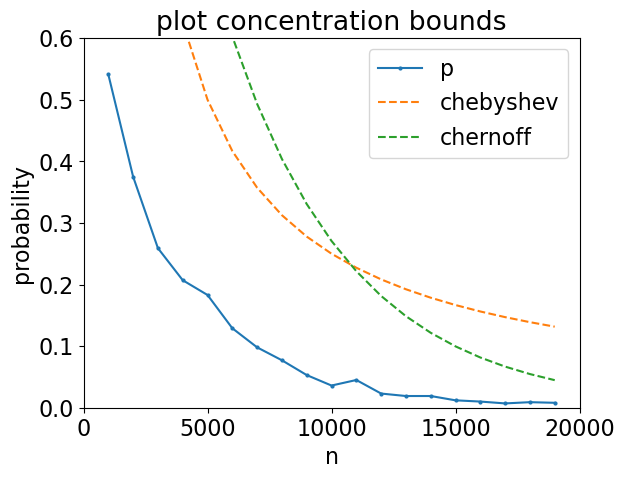

In [63]:
# now set eps = 0.02
n_seq = range(1000,20000,1000)
eps = 0.02
iternum = 1000 # generate samples 1000 times to calculate the probability

list_p = [] # use it to store the prob
for n in n_seq:
    # generate random numbers with size (iternum,n)
    random_sample = np.random.normal(loc=0.0, scale=1.0, size=(iternum,n))
    # calculate the sample mean of each row
    sample_mean = np.mean(random_sample,axis=1)
    list_p.append(np.sum(np.abs(sample_mean)>eps)/iternum)
    
# calculate chebyshev bound
list_cheby = 1/(eps*eps*np.array(n_seq))
# calculate chernoff bound
list_chernoff = 2*np.exp(-eps*eps*np.array(n_seq)/2)

# plot
plt.plot(n_seq,list_p,marker='o',markersize=2,linestyle='-',label='p')
plt.plot(n_seq,list_cheby,linestyle='--',label='chebyshev')
plt.plot(n_seq,list_chernoff,linestyle='--',label='chernoff')
plt.ylim([0,0.6])
plt.ylabel('probability')
plt.xlim([0,20000])
plt.xlabel('n')
plt.title('plot concentration bounds')
plt.legend()
plt.show()

$$
\mathbb P \left( | \bar X_n | > \epsilon \right) \leq min(\frac{1}{n \epsilon^2}, 2 \exp \left( - \frac{\epsilon^2 n}{2} \right) )
$$
o(1/n) and o(e^-n)

$\sum_{i=1}^\infty1/n=\infty$

$\sum_{i=1}^\infty e^{-n} <\infty$

prove above two bounds. (pic in class)

<img src="pic.jpg" alt="Solution" />

### 2. Central Limit theorem 

Let's first state one more time the Central Limit Theorem

> Consider $X_1, X_2, \ldots, X_n$ a sequence of i.i.d. random variables with mean $\mathbb{E}[X_1] = \mu$ and finite variance $\mathbb{V}ar[X_1] = \sigma^2$. If call 
$$
\bar X_n = \frac{1}{n} \sum_{i=1}^n X_i
$$
the sample mean, then 
$$
\sqrt{n} \frac{\bar X_n - \mu}{\sigma}
$$
converges in distribution to the standard Normal distribution $N(0,1)$.



#### 2.1. Continuous case

Pick a continuous random variable with bounded second moment and show that the central limit theorem holds numerically. Sample the sample mean $\bar X_n$ for various numbers of $n$ and show that $\sqrt{n}(\bar X_n - \mu) / \sigma$ converges to the standard normal distribution.

This is how the solution should look like for the mean of Beta distributions and a total of 10000 simulations. 

<img src="solution_2_1.png" alt="Solution" />

In [65]:
# define a function to plot
def plot_CLT_func(FUN, n, mu,sigma,bins=100,*args, **kwargs):  
    iternum = 10000
    # generate random numbers with size (iternum,n)
    random_sample = FUN(*args, size=(iternum,n))
    # calculate the sample mean of each row
    sample_mean = np.mean(random_sample,axis=1)
    
    # plot hist
    CLT_list = np.sqrt(n)*(sample_mean-mu)/sigma
    plt.hist(CLT_list,bins = bins, density=True)
    
    # plot N(0,1)
    x = np.linspace(-4, 4, 1000)  # Create an array of x values from -4 to 4
    norm_pdf = norm.pdf(x, loc=0, scale=1)
    
    plt.plot(x,norm_pdf,linewidth=2.0)
    plt.xlabel('x')
    plt.ylabel('prob')

### gamma distribution

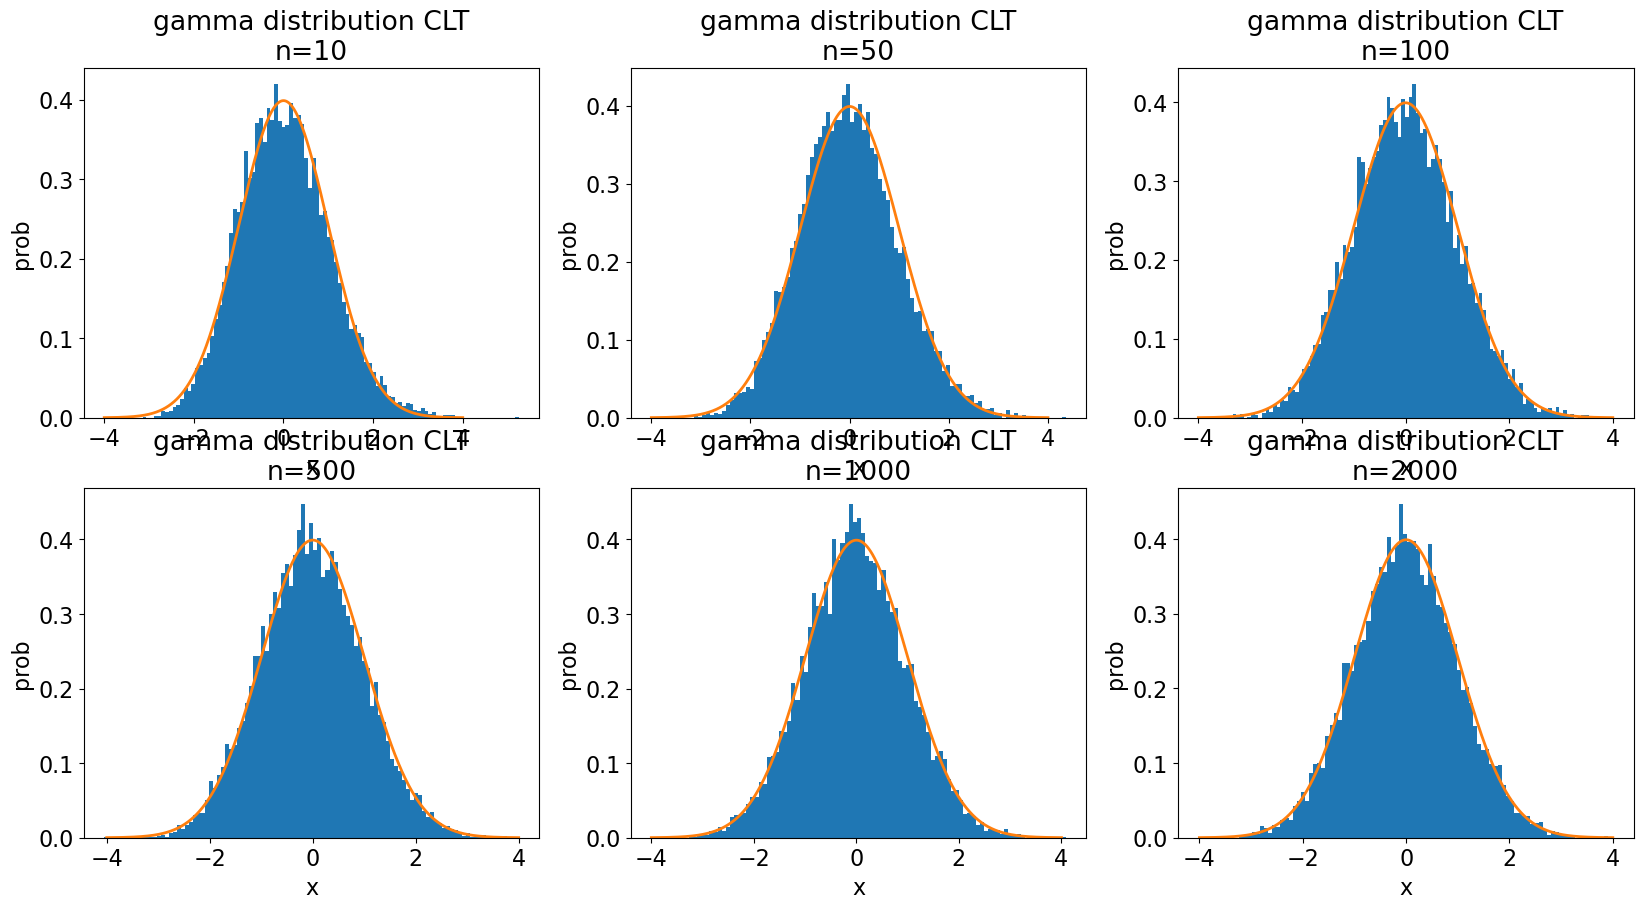

In [46]:
# gamma distribution
shape_para = 4
scale_para = 2
n_seq = [10,50,100,500,1000,2000]
# calculate the mean(mu) and sd(sigma)
sigma = np.sqrt(shape_para*scale_para*scale_para)
mu = shape_para*scale_para

plt.rcParams['figure.max_open_warning'] = 50
plt.figure(figsize=(20, 10))

for i in range(len(n_seq)):
    plt.subplot(2,3,i+1)
    # use plot_CLT_func() to plot
    plot_CLT_func(np.random.gamma,n_seq[i], mu, sigma, shape_para, scale_para)
    plt.title('gamma distribution CLT\nn='+str(n_seq[i]))
plt.show()  

### beta distribution

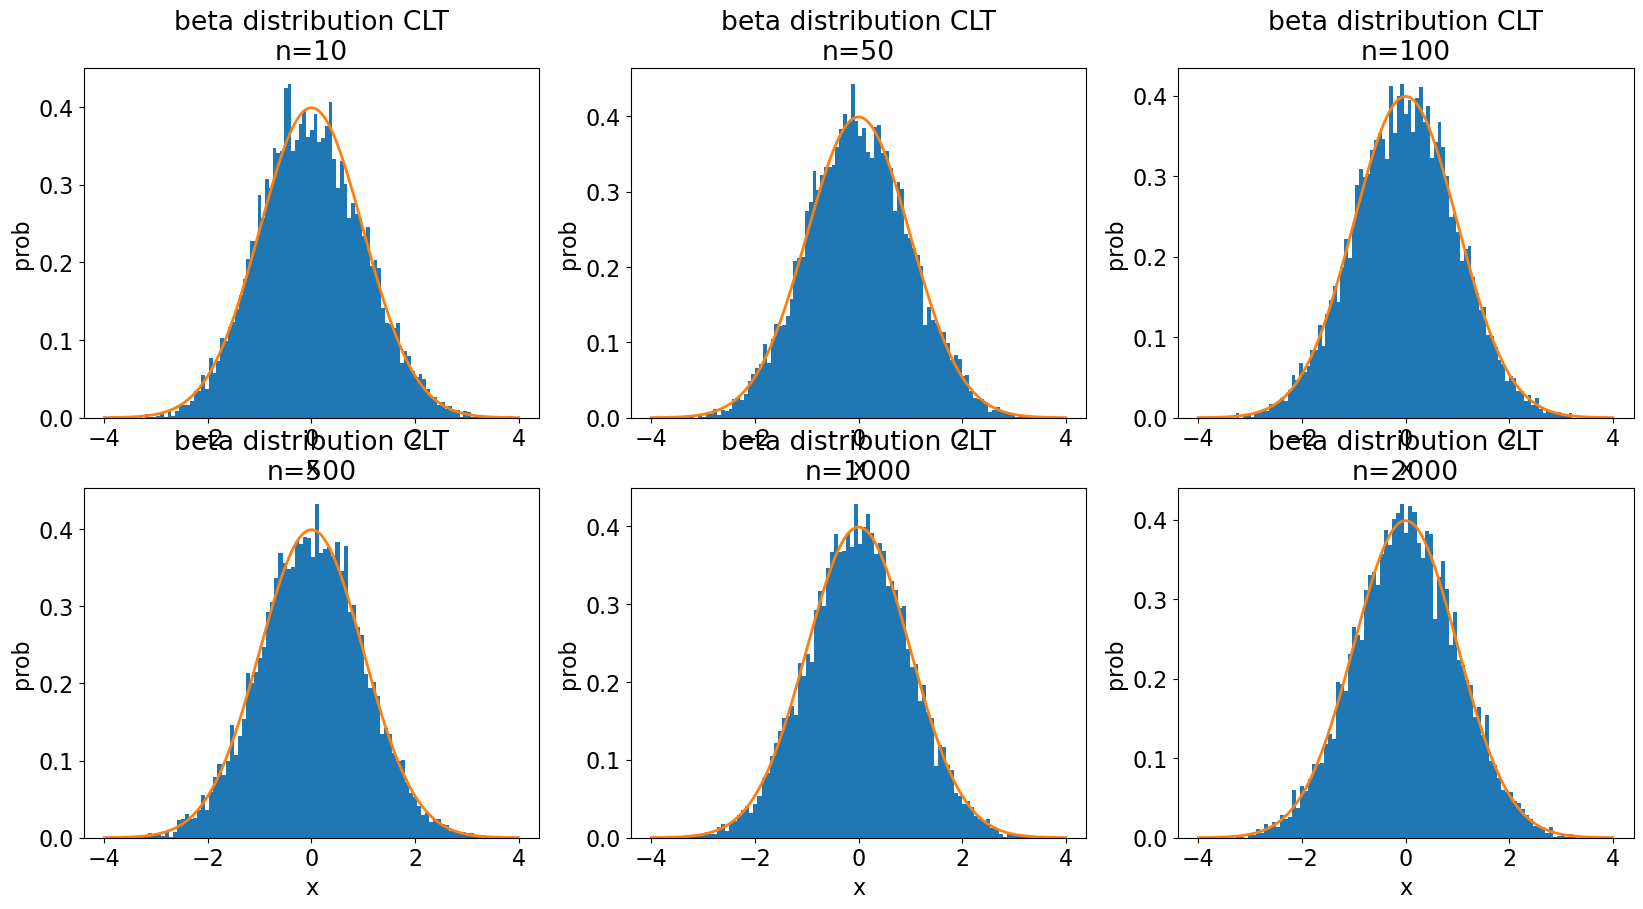

In [48]:
# beta distribution
alpha = 2
beta = 3
# calculate the mean(mu) and sd(sigma)
mu = alpha/(alpha+beta)
sigma = np.sqrt(alpha*beta/(alpha+beta)/(alpha+beta)/(alpha+beta+1))

plt.rcParams['figure.max_open_warning'] = 50
plt.figure(figsize=(20, 10))

for i in range(len(n_seq)):
    plt.subplot(2,3,i+1)
    # use plot_CLT_func() to plot
    plot_CLT_func(np.random.beta,n_seq[i], mu, sigma, alpha, beta)
    plt.title('beta distribution CLT\nn='+str(n_seq[i]))
plt.show()  

### exponential distribution

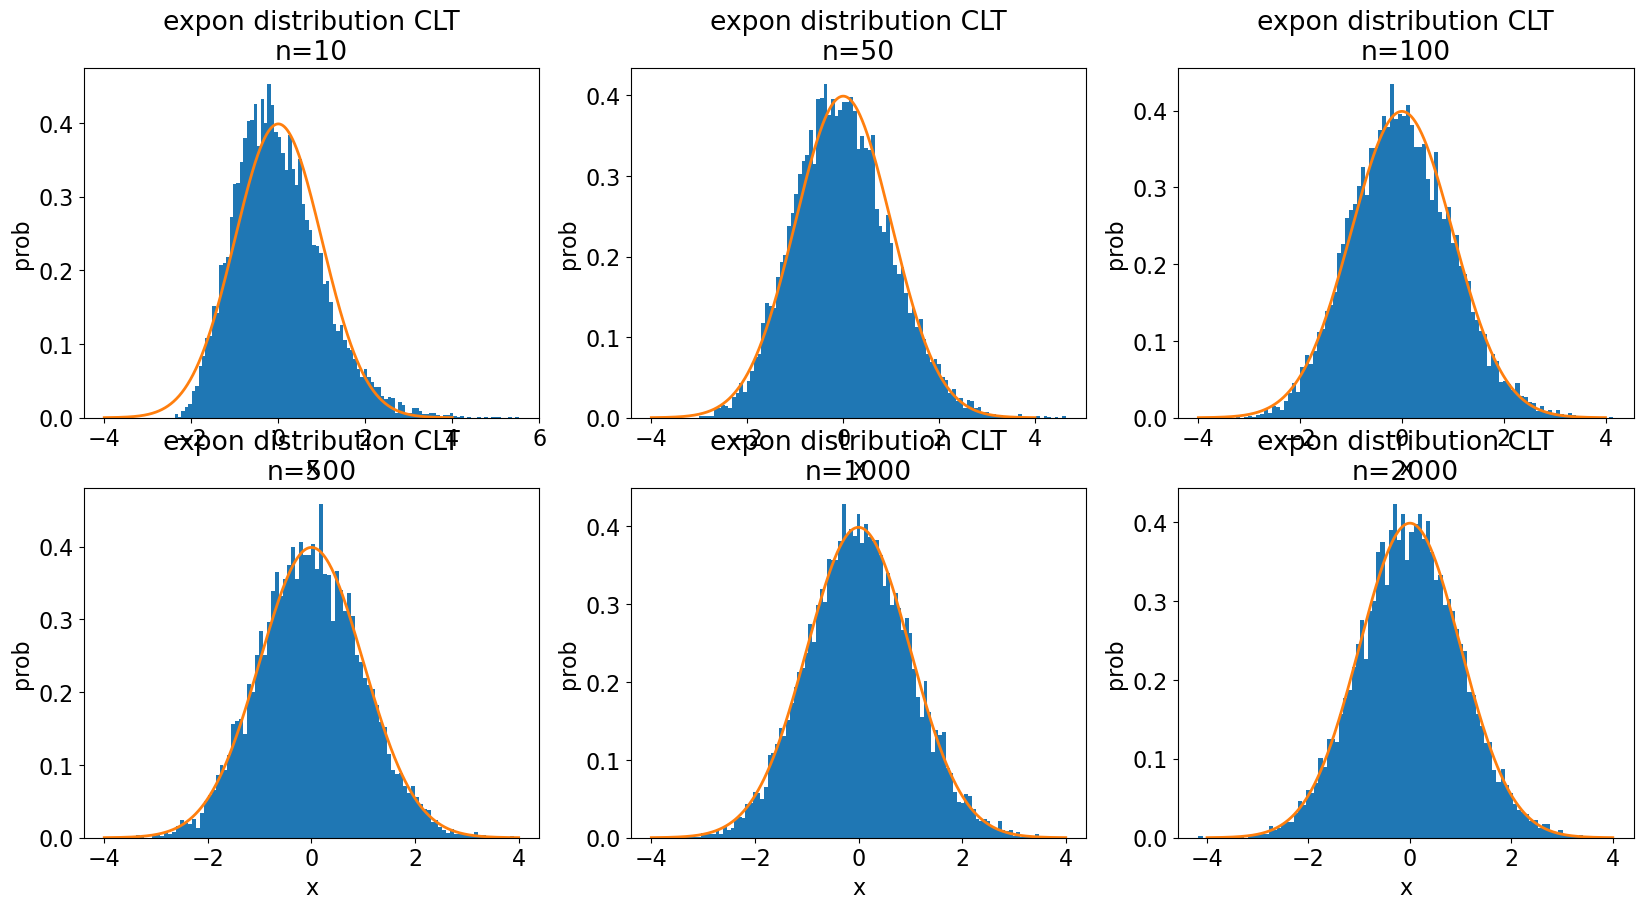

In [67]:
# exponential distribution
rate_para = 0.5
# calculate the mean(mu) and sd(sigma)
mu = 1/rate_para
sigma = 1/rate_para

plt.rcParams['figure.max_open_warning'] = 50
plt.figure(figsize=(20, 10))

for i in range(len(n_seq)):
    plt.subplot(2,3,i+1)
    # use plot_CLT_func() to plot
    plot_CLT_func(np.random.exponential,n_seq[i], mu, sigma, 100, 1/rate_para)
    plt.title('expon distribution CLT\nn='+str(n_seq[i]))
plt.show()  

#### 2.2. Discrete case

Repeat the experiment but now with a discrete random variable. When plotting the histogram, be careful on how you define the bins. 


### binomial distribution


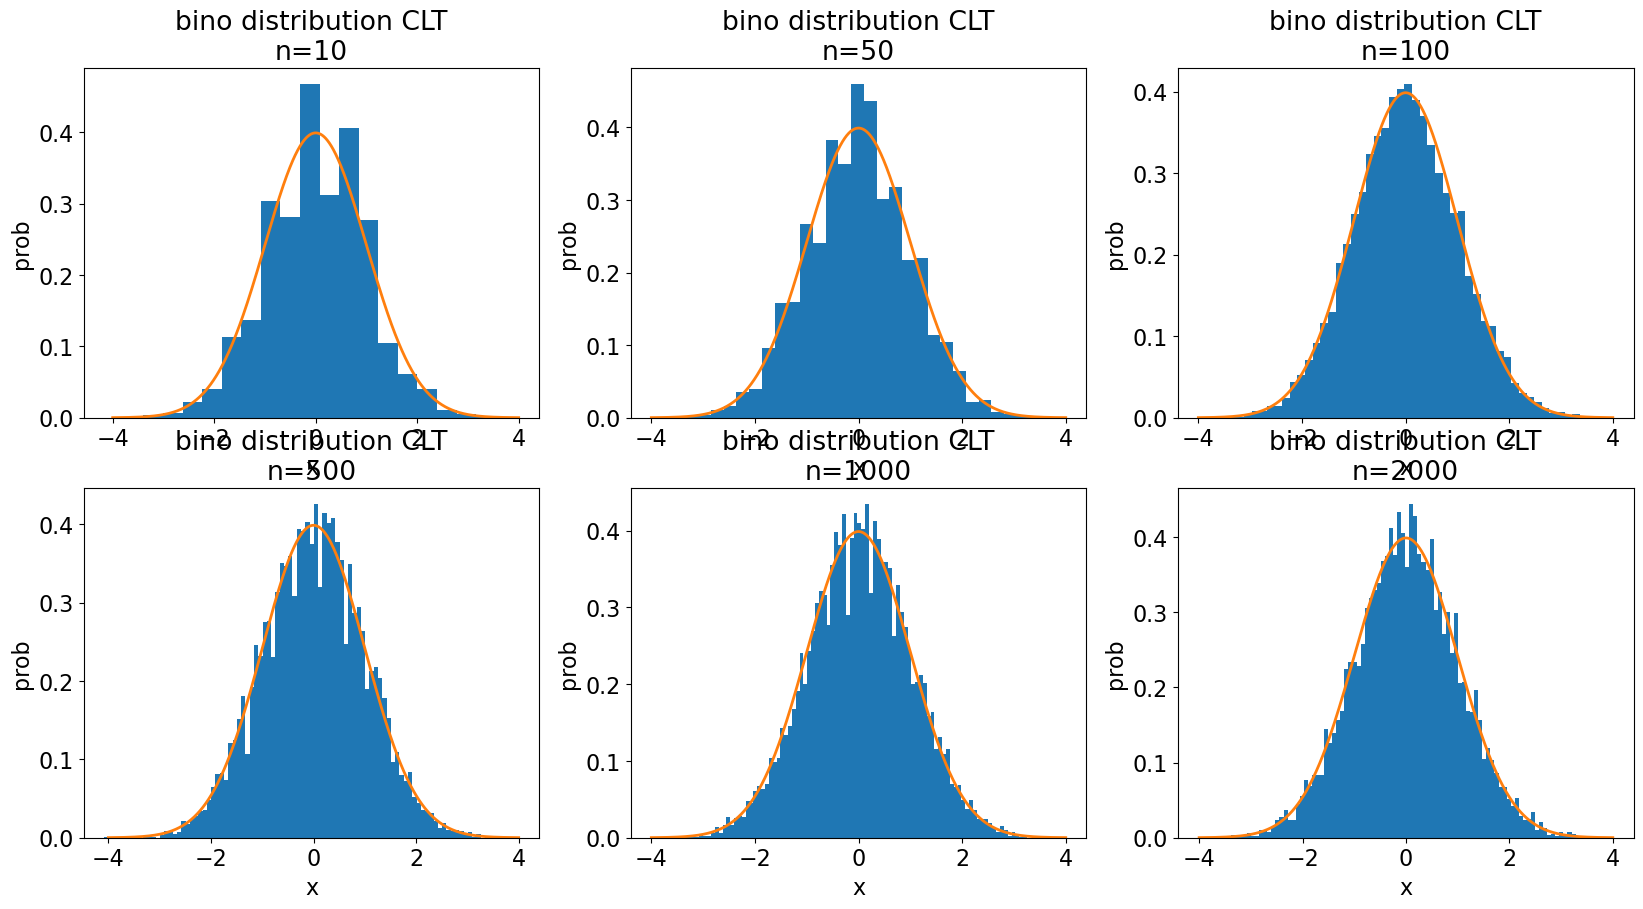

In [77]:
bino_n = 20
bino_p = 0.7
# calculate the mean(mu) and sd(sigma)
mu = bino_n*bino_p
sigma = np.sqrt(mu*(1-bino_p))

plt.rcParams['figure.max_open_warning'] = 50
plt.figure(figsize=(20, 10))

bins0 = [20,30,50,90,100,100]
#bins0 = [100,100,100,100,100,100]
for i in range(len(n_seq)):
    plt.subplot(2,3,i+1)
    # use plot_CLT_func() to plot
    plot_CLT_func(np.random.binomial,n_seq[i], mu, sigma, bins0[i], bino_n, bino_p)
    plt.title('bino distribution CLT\nn='+str(n_seq[i]))
plt.show()  

## poisson distribution

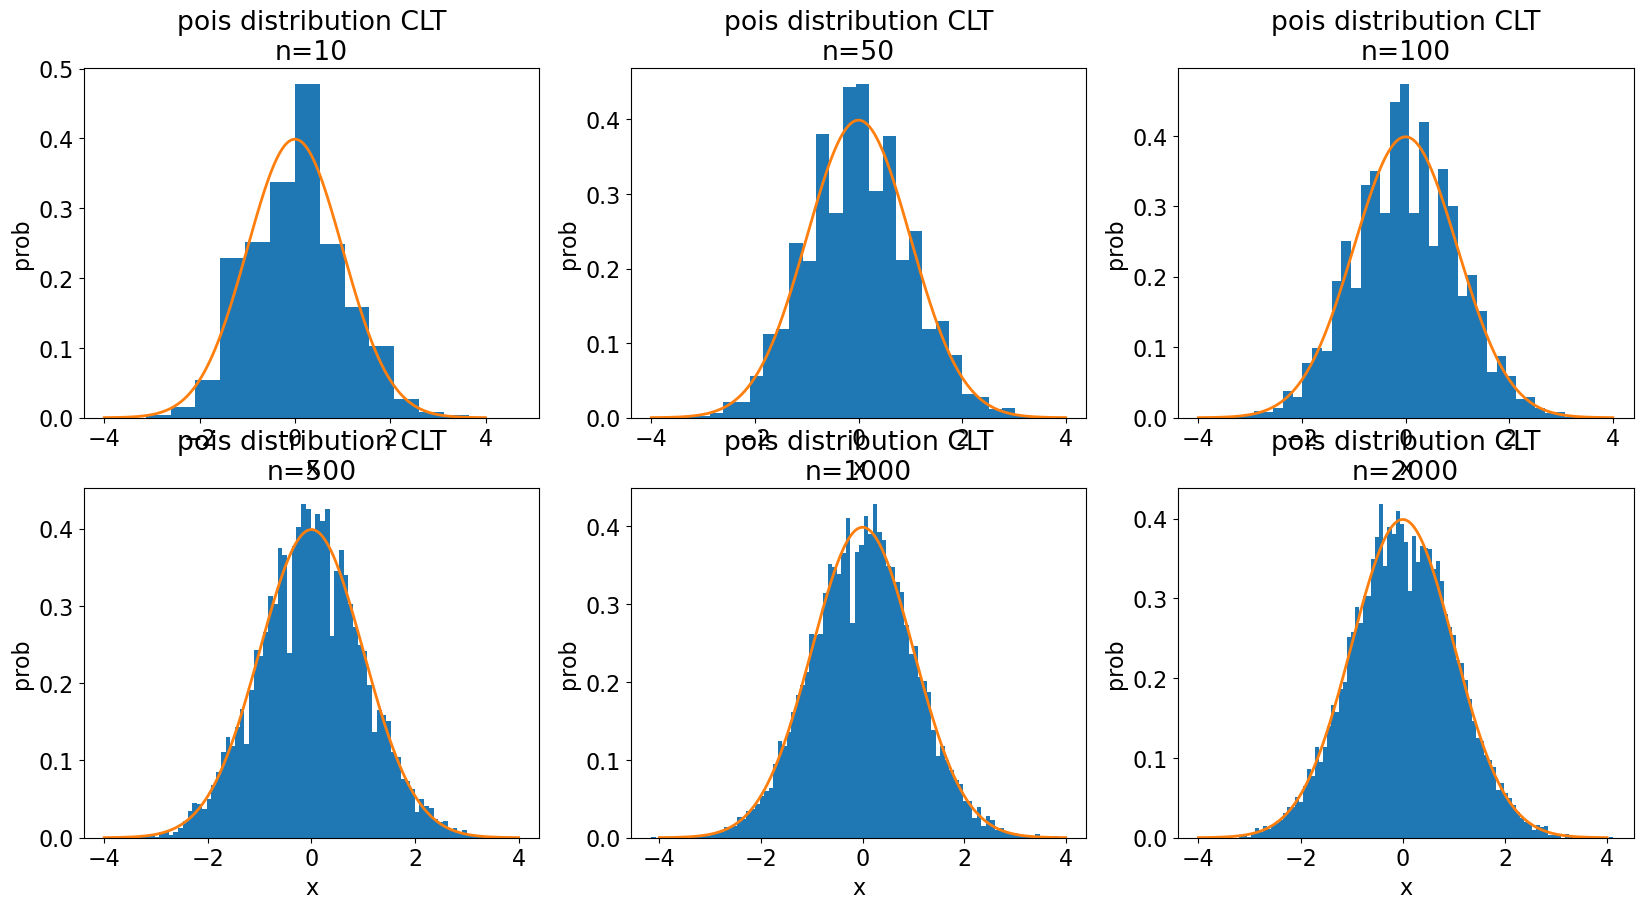

In [86]:
lam = 2
# calculate the mean(mu) and sd(sigma)
mu = lam
sigma = np.sqrt(lam)

plt.rcParams['figure.max_open_warning'] = 50
plt.figure(figsize=(20, 10))

bins0 = [15,30,40,80,90,100]
#bins0 = [100,100,100,100,100,100]
for i in range(len(n_seq)):
    plt.subplot(2,3,i+1)
    # use plot_CLT_func() to plot
    plot_CLT_func(np.random.poisson,n_seq[i], mu, sigma, bins0[i], lam)
    plt.title('pois distribution CLT\nn='+str(n_seq[i]))
plt.show() 

#### 2.3. [Optional] Distribution without second moment

Consider now a distribution with defined mean without finite second moment. In principle, the central limit theorem does not apply for this case. Generate a simulation of the sample mean for a distribution with these properties and try to understand the behavior of the scaled sample mean as $n$ increases. You may find interesting the reading about [stable distributions](https://en.wikipedia.org/wiki/Stable_distribution).

### zeta distribution

<Figure size 2000x1000 with 0 Axes>

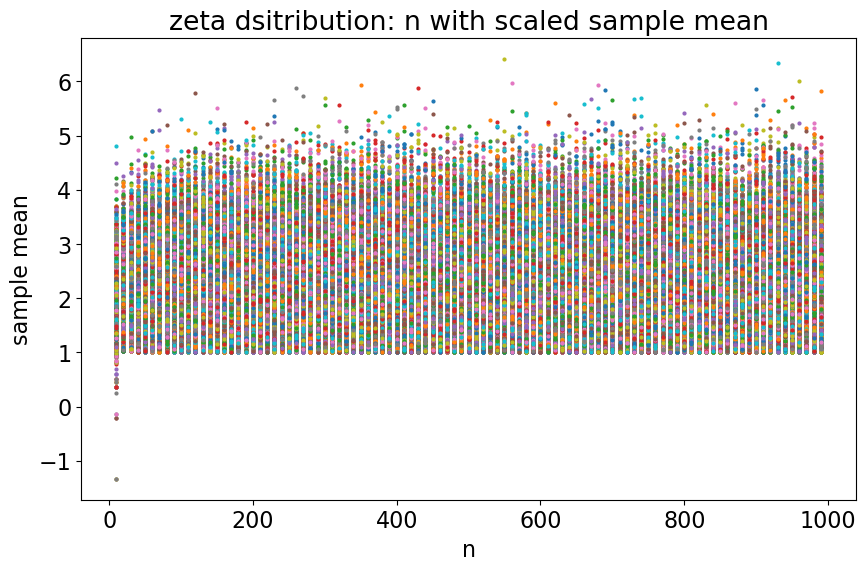

In [9]:
iternum = 10000
a = 1.5
n_seq = range(10,1000,10)
import scipy.special as sp
mu = sp.zeta(2)/sp.zeta(a+1) # mean of zeta distribution

plt.rcParams['figure.max_open_warning'] = 50
plt.figure(figsize=(20, 10))

sample_means = []
for i in range(len(n_seq)):
    random_sample = np.random.zipf(a, size=(iternum, n_seq[i]))
    # calculate the scaled sample means
    means = (np.mean(random_sample, axis=1)-mu)*np.sqrt(n_seq[i])/np.sqrt(np.var(random_sample, axis=1))
    sample_means.append(means)

# Plot the behavior of the scaled sample mean as n increases
plt.figure(figsize=(10, 6))
plt.plot(n_seq, sample_means, '.', markersize=4)
plt.xlabel('n')
plt.ylabel('sample mean')
plt.title('zeta dsitribution: n with scaled sample mean')
plt.show()

In [10]:
print('mean =',mu)

mean = 1.2262017831009118


### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Yiqiao Huang
- Member No2: 
- Member No3: